In [1]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [14]:
## read in data
url = 'https://raw.githubusercontent.com/USD-AAI-500-Stats-Group-2/Stats500FinalProject/main/data/student_habits_performance.csv'

student_habits = pd.read_csv(url)
student_habits.head(15)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [18]:
## identify falsely coded nulls
nulls = pd.DataFrame(student_habits.isnull().sum(), columns=['Nulls'])
nulls = nulls[nulls['Nulls']>0]
nulls

## replace with 'None'
student_habits['parental_education_level'] = student_habits['parental_education_level'].fillna('None')

In [19]:
## assign ordered levels for ordinal variables

# gender
student_habits['gender'].value_counts()
student_habits['gender'] = pd.Categorical(student_habits['gender'],
                                          categories = ['Male', 'Female', 'Other'],
                                          ordered = False)

# part time job
student_habits['part_time_job'].value_counts()
student_habits['part_time_job'] = pd.Categorical(student_habits['part_time_job'],
                                          categories = ['No', 'Yes'],
                                          ordered = False)

# diet quality
student_habits['diet_quality'].value_counts()
student_habits['diet_quality'] = pd.Categorical(student_habits['diet_quality'],
                                          categories = ['Poor', 'Fair', 'Good'],
                                          ordered = False)

# parental education level
student_habits['parental_education_level'].value_counts()
student_habits['parental_education_level'] = pd.Categorical(student_habits['parental_education_level'],
                                          categories = ['None', 'High School', 'Bachelor', 'Master'],
                                          ordered = False)

# internet quality
student_habits['internet_quality'].value_counts()
student_habits['internet_quality'] = pd.Categorical(student_habits['internet_quality'],
                                          categories = ['Poor', 'Average', 'Good'],
                                          ordered = False)

# extracurricular participation
student_habits['extracurricular_participation'].value_counts()
student_habits['extracurricular_participation'] = pd.Categorical(student_habits['extracurricular_participation'],
                                          categories = ['No', 'Yes'],
                                          ordered = False)

In [25]:
#### linear regression with all variables (except student_id)

## identify independent (x) and dependent (y) variables
x = student_habits[['age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                    'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency',
                    'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation']]
y = student_habits['exam_score']

## create dummy variables for categorical data
x = pd.get_dummies(x, drop_first = True)

## split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)

## add intercept
x_train = sm.add_constant(x_train)

## convert to float variable types
x_train = x_train.astype(float)
y_train = y_train.astype(float)

## train model
model_linear = sm.OLS(y_train, x_train).fit()

## view model
print(model_linear.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     374.9
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        03:31:13   Log-Likelihood:                -2482.0
No. Observations:                 800   AIC:                             5004.
Df Residuals:                     780   BIC:                             5098.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [33]:
### evaluate linear regression

## add constant column to test set
x_test = sm.add_constant(x_test)

## predict y based on x's
y_test_pred = model_linear.predict(x_test)

## view metrics
print('R^2 on test: %.4f' % r2_score(y_test, y_test_pred))

R^2 on test: 0.9019


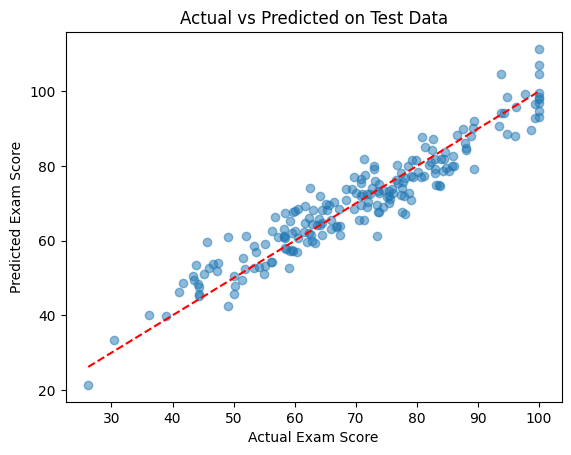

In [34]:
## goodness of fit
plt.scatter(y_test, y_test_pred, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted on Test Data')
plt.show()

# interpretation: points are close to red dashed line, which indicates good predictions

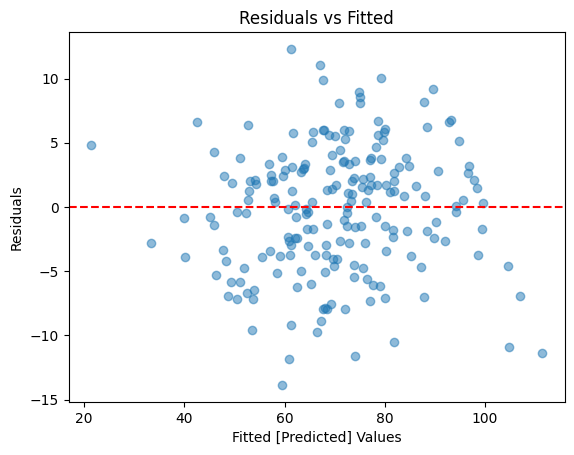

In [35]:
## check for linearity and homoscedasticity
residuals = y_test - y_test_pred

plt.scatter(y_test_pred, residuals, alpha = 0.5)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Fitted [Predicted] Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# interpretation: points appear to have random scatter around 0, no concerning patterns

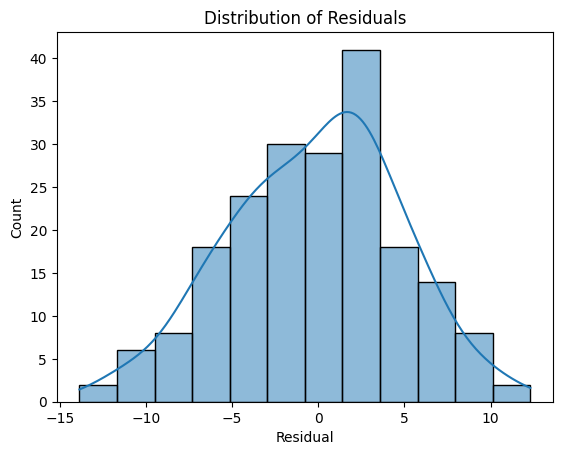

In [36]:
## check for normality of residuals

sns.histplot(residuals, kde = True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.show()

# interpretation: distribution looks roughly bell-shaped, hence residuals are normal

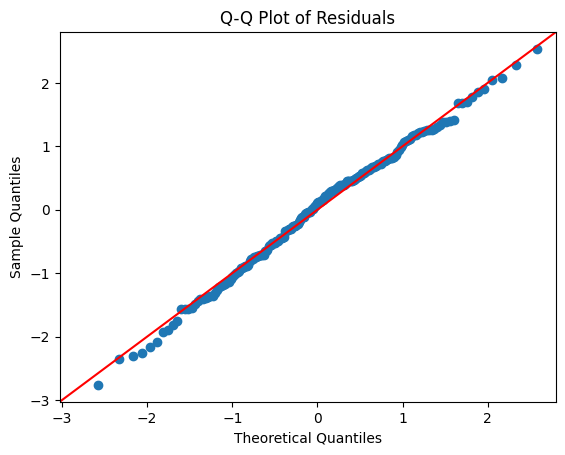

In [37]:
## Q-Q Plot for Residual Normality

residuals = pd.to_numeric(residuals, errors = 'coerce')
sm.qqplot(residuals, line = '45', fit = True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# interpretation: points roughly follow the 45 degree line

In [38]:
#### change exam_score into pass/fail binary variable

## threshold for pass/fail
pass_threshold = 70

## convert variable
student_habits['pass_fail'] = (pd.to_numeric(student_habits['exam_score'], errors = 'coerce') >= pass_threshold).astype(int)

## view new variable
print(student_habits['pass_fail'].value_counts())

pass_fail
1    511
0    489
Name: count, dtype: int64


In [39]:
# wip

model = smf.glm(
    formula = 'pass_fail ~ age + gender + study_hours_per_day + social_media_hours + netflix_hours + \
               part_time_job + attendance_percentage + sleep_hours + diet_quality + \
               exercise_frequency + parental_education_level + internet_quality + \
               mental_health_rating + extracurricular_participation',
    data = student_habits,
    family = sm.families.Binomial()
).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              pass_fail   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      980
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -212.90
Date:                Wed, 08 Oct 2025   Deviance:                       425.81
Time:                        03:34:58   Pearson chi2:                     584.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6171
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------